Joshua Matni

CS 422

Neural Networks

This project provides written code for a basic neural network in pytorch. It is up to you to figure out the proper hyperparameters to get the best accuracy for the data you can. The goal is to achieve an accuracy greater than or equal to 93%

In [14]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(30)    # set seed for reproducibality

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(1*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-1*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

These are the first set of hyperparameters to set.

In [15]:
######################## HYPERPARAMETER TUNING 1 Start #########################
hidden = 4             # number of features in the hidden layer, should be greater than input feature amount
learning_rate = 0.01     # the rate should be a float value
epochs = 100          # number of training iterations
######################## HYPERPARAMETER TUNING 1 End ###########################

In [16]:
net = Net(n_feature=2, n_hidden=hidden, n_output=2)     # define the network

This is the second code block to set hyperparameters for. Two optimizer algorithms are provided. It is up to you to decide which one performs better for the data provided.

In [17]:
######################## HYPERPARAMETER TUNING 2 Start #########################
# There are two optimizer options.  It is up to you to choose which one to use
# optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
######################## HYPERPARAMETER TUNING 2 End ###########################

Net(
  (hidden): Linear(in_features=2, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=2, bias=True)
)


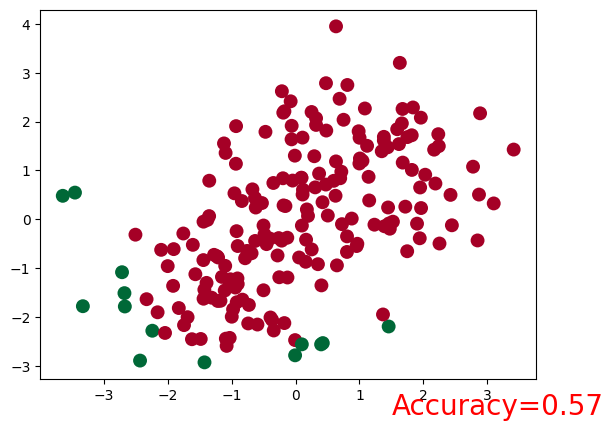

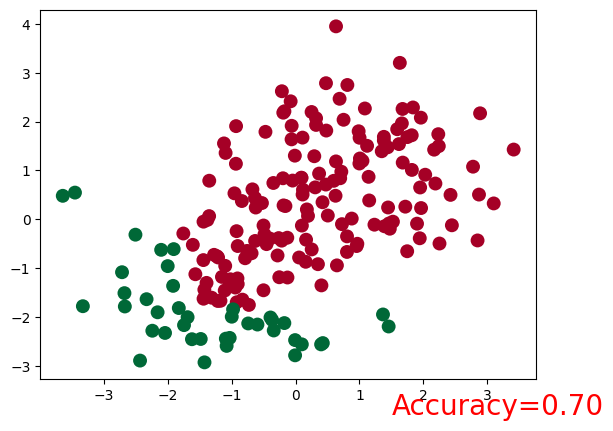

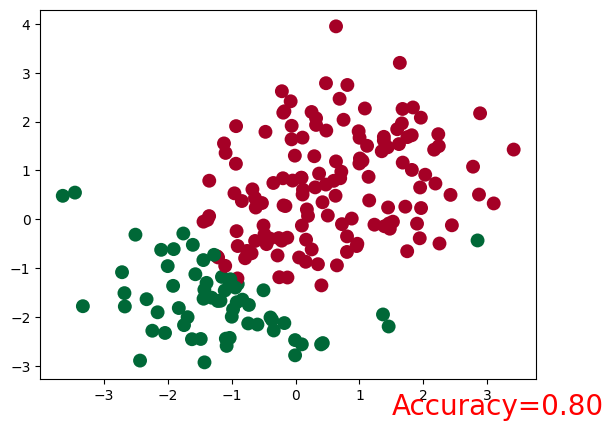

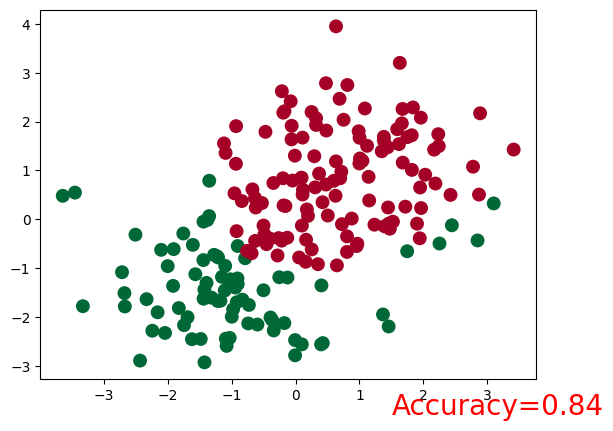

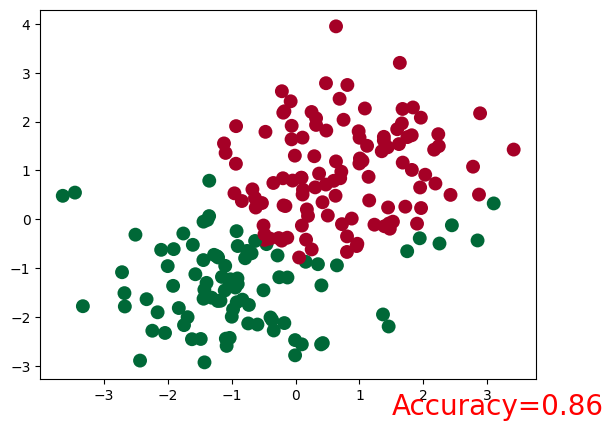

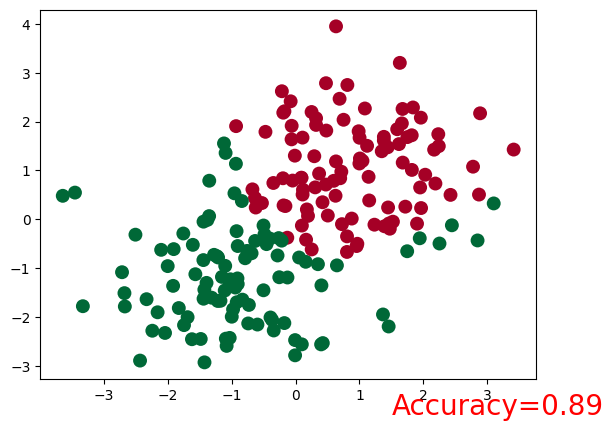

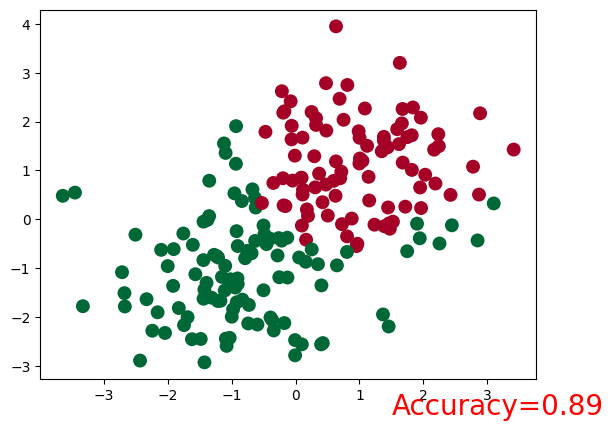

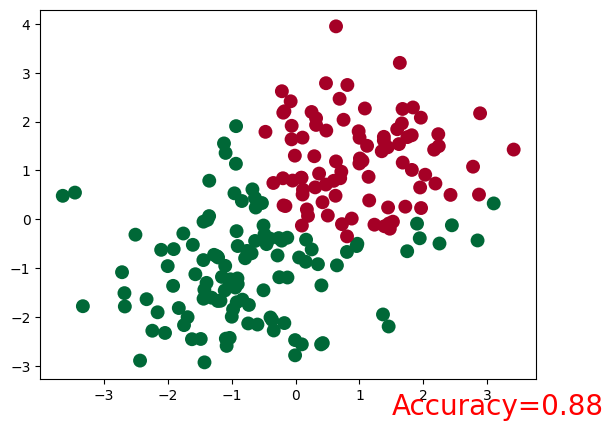

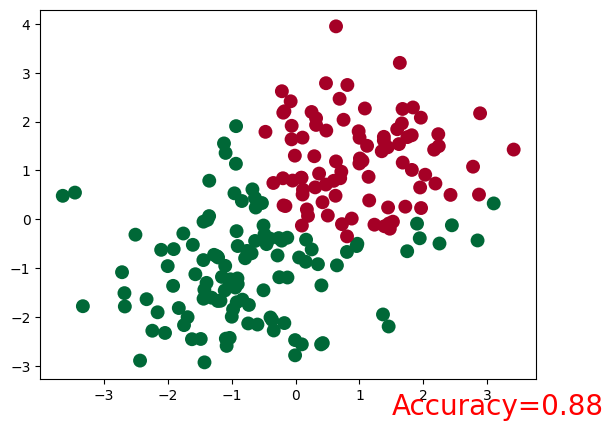

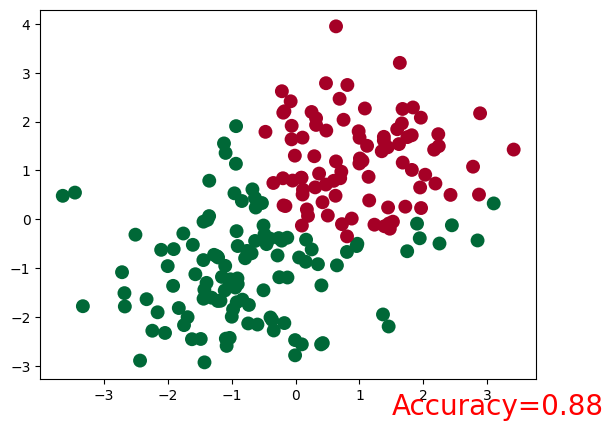

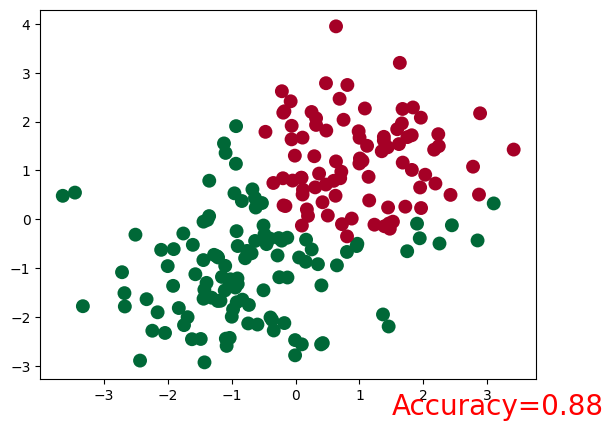

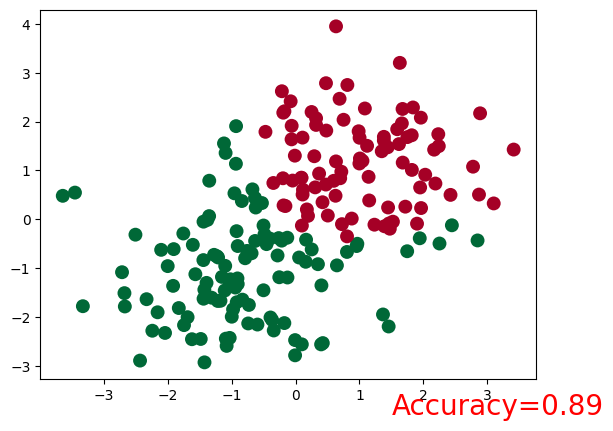

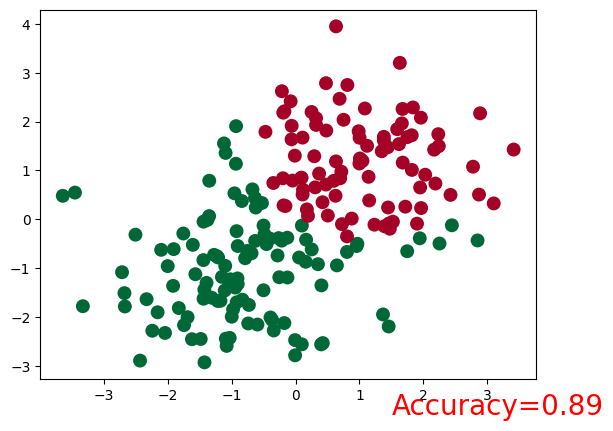

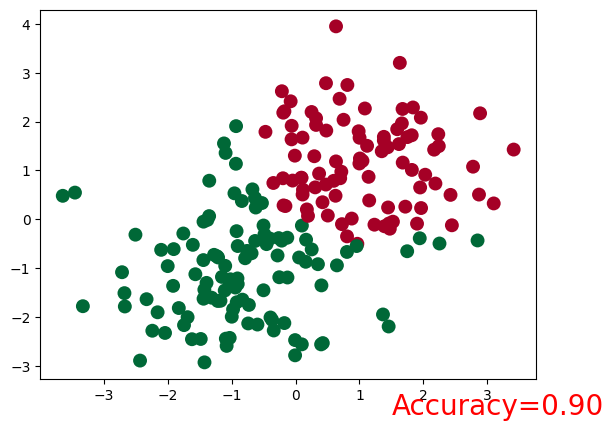

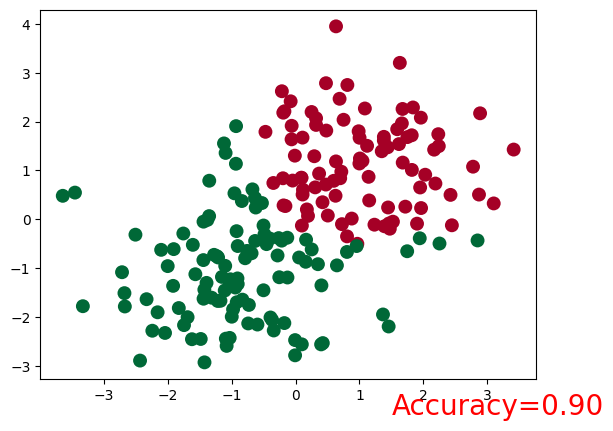

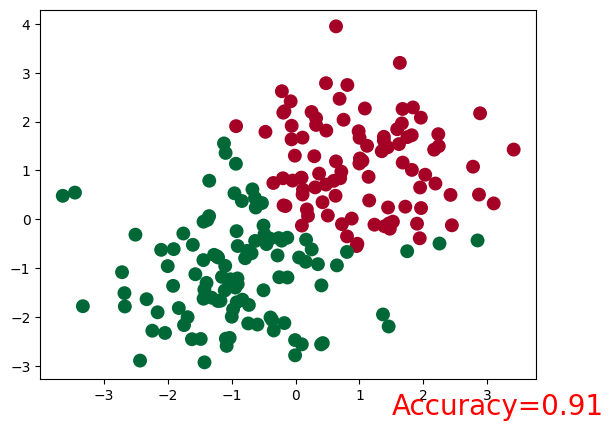

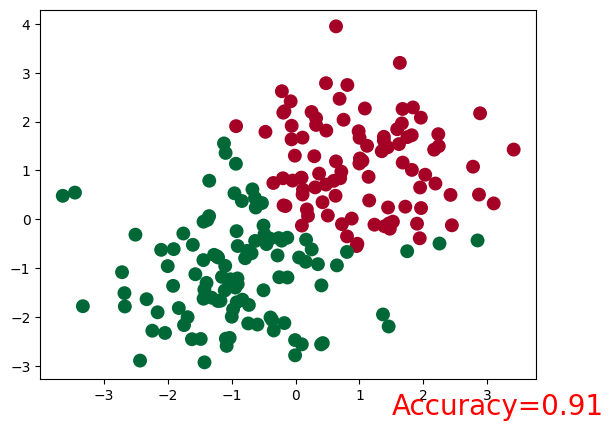

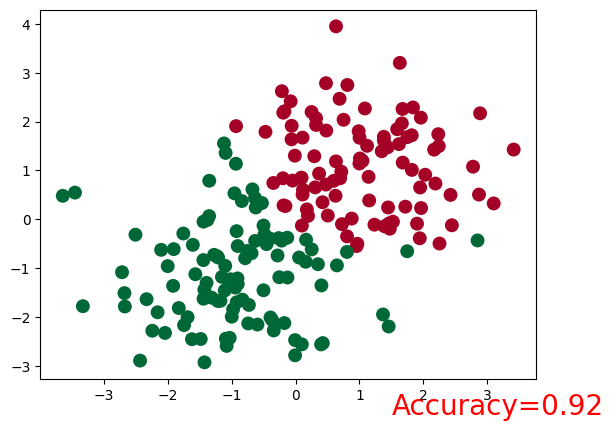

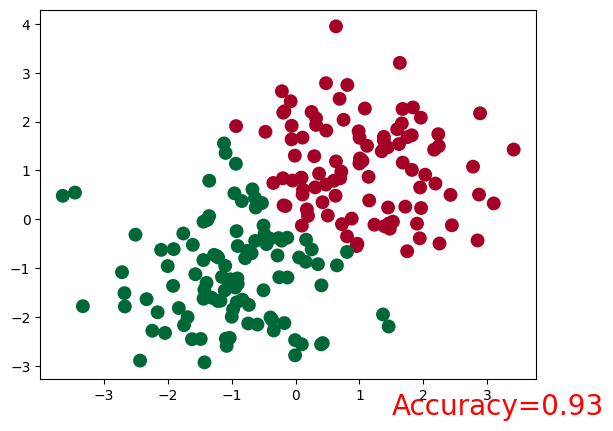

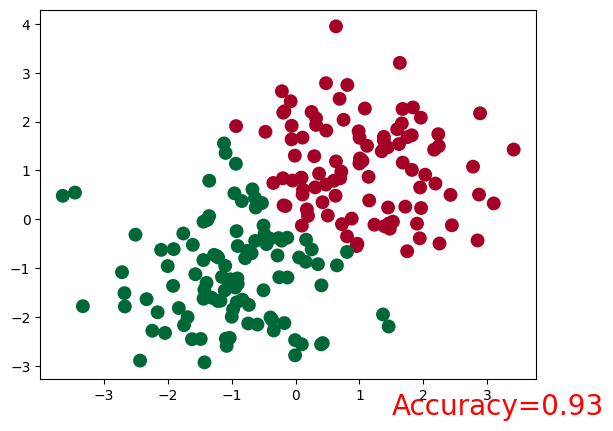

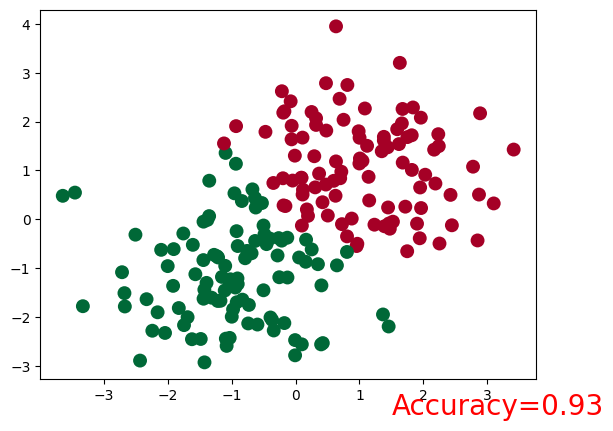

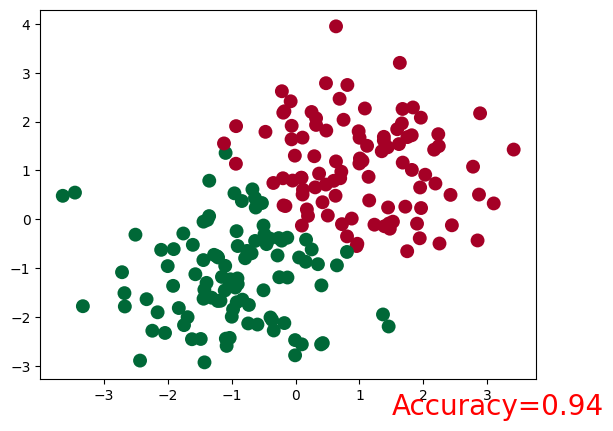

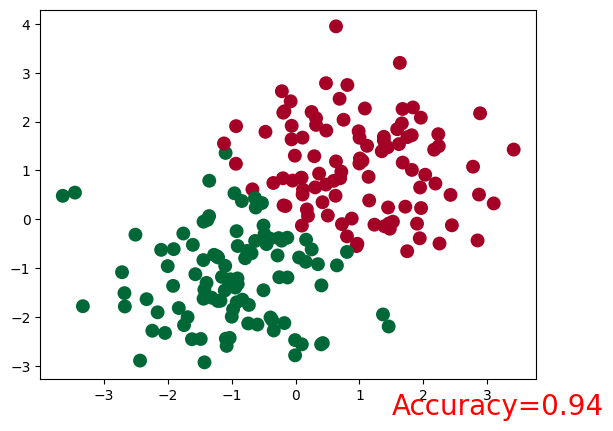

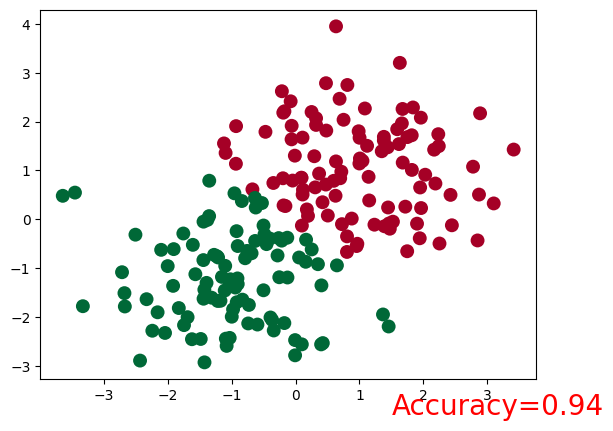

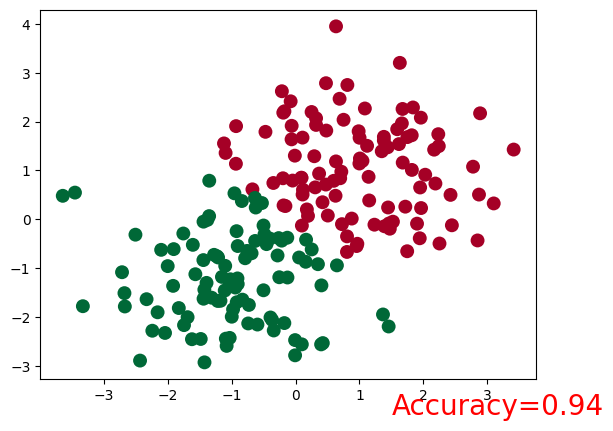

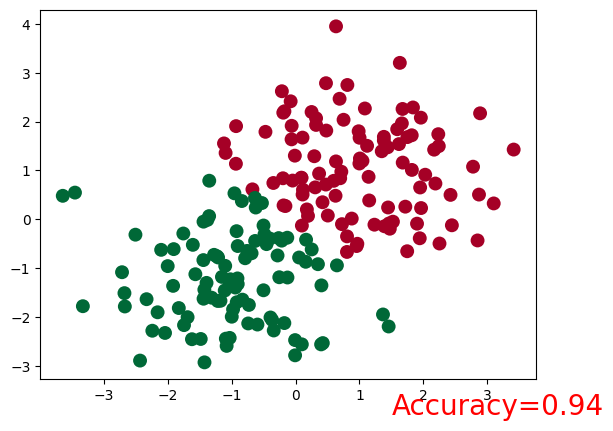

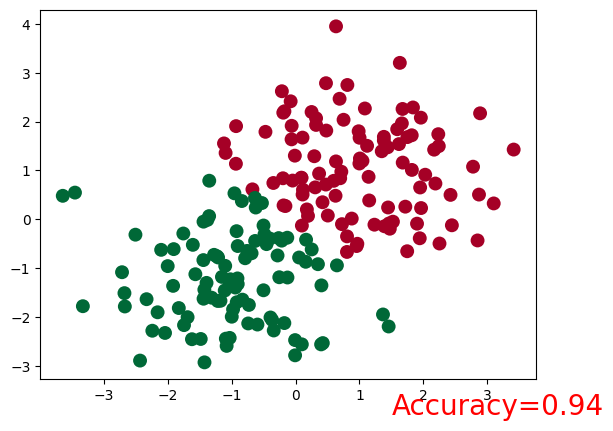

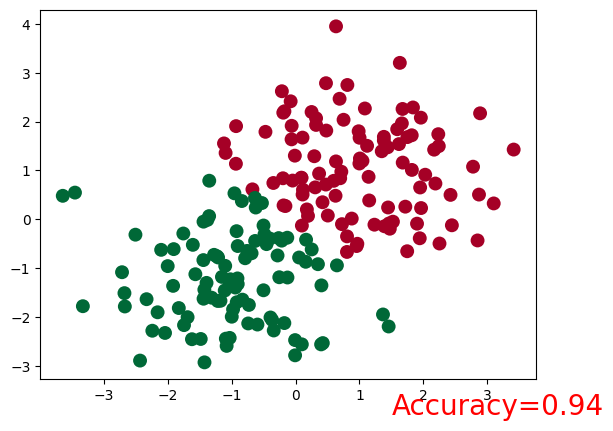

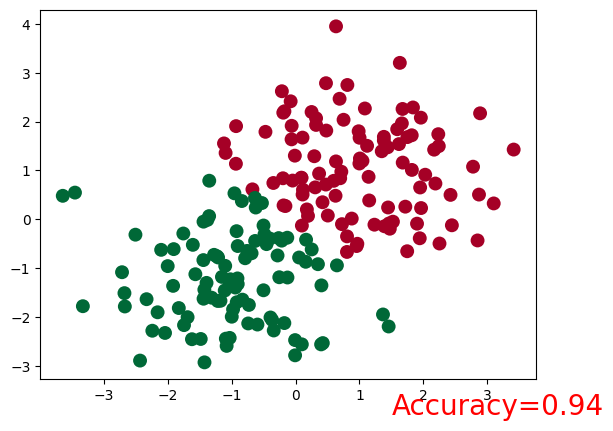

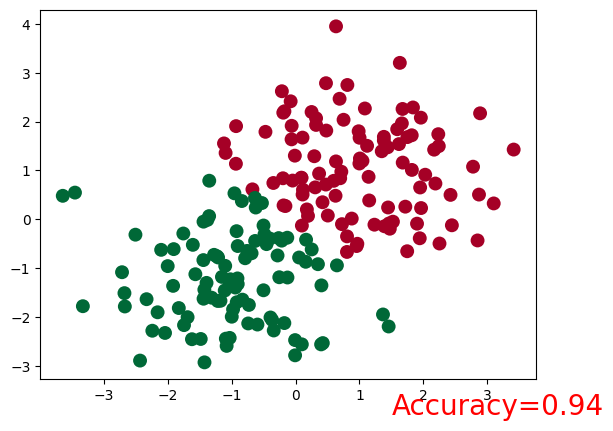

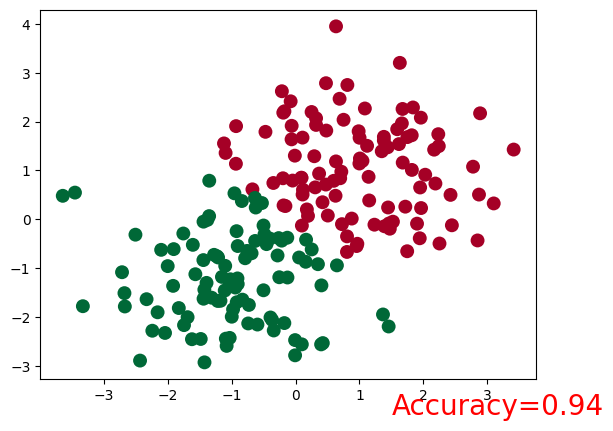

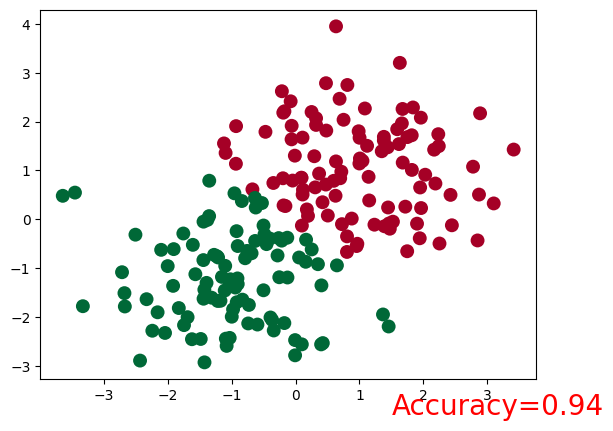

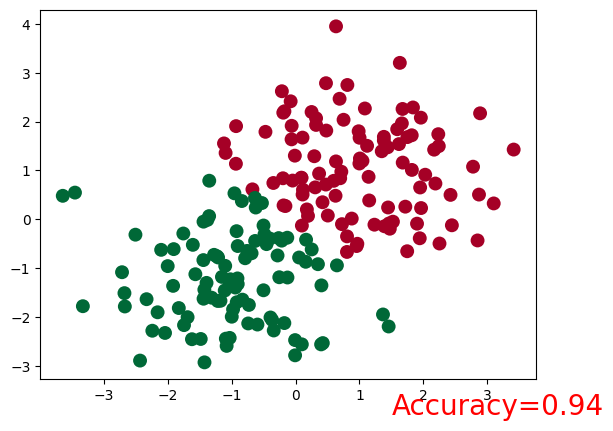

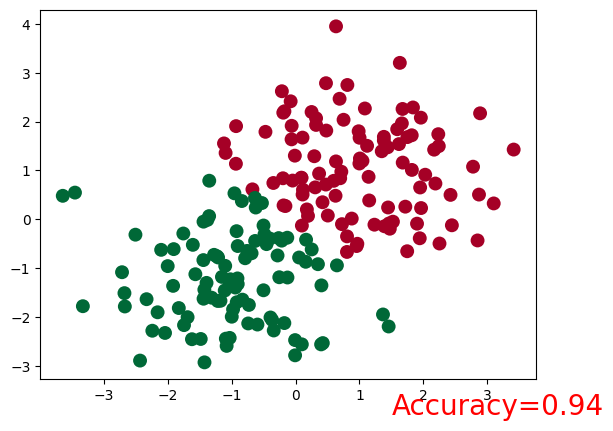

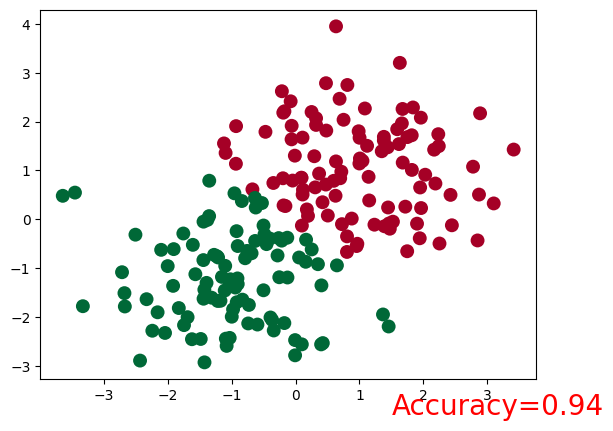

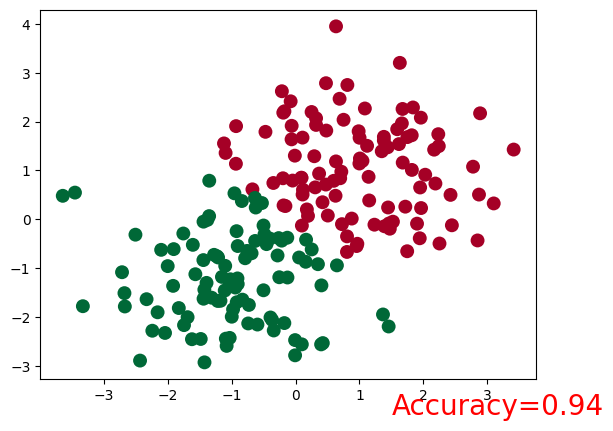

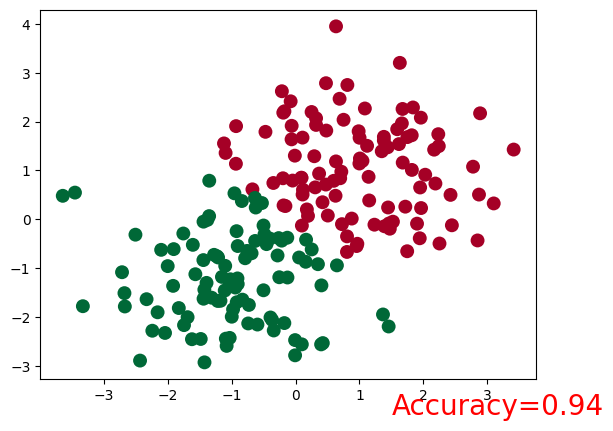

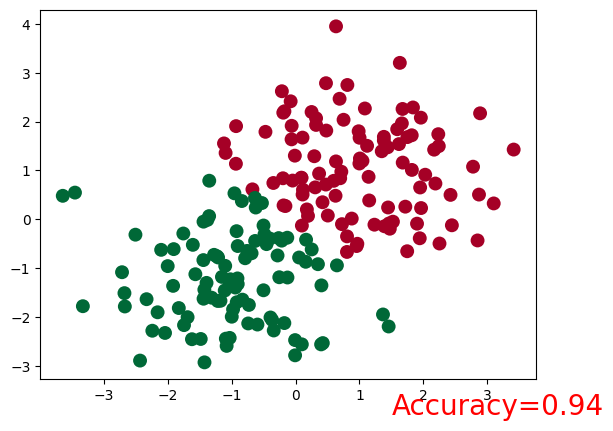

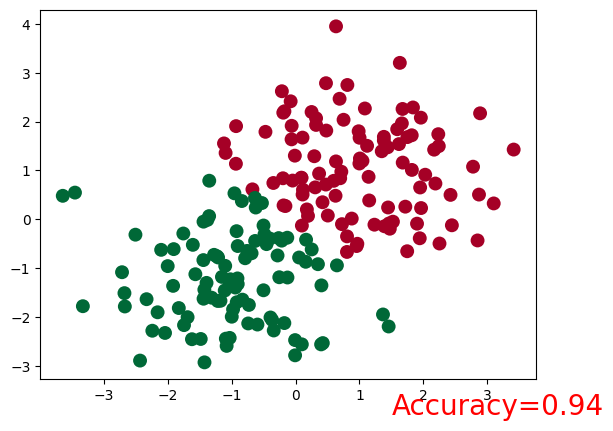

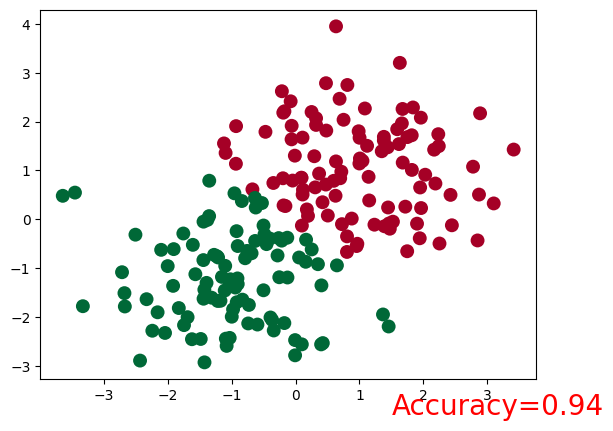

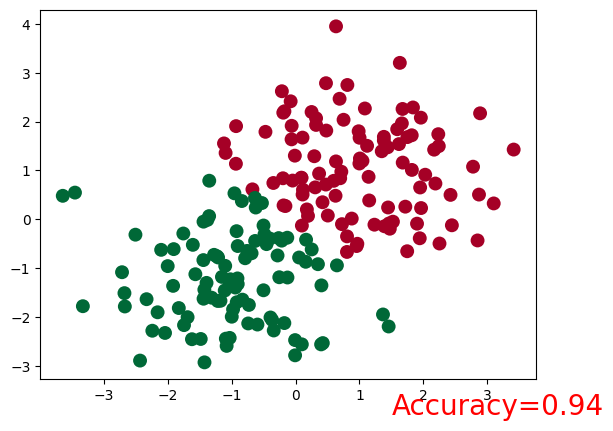

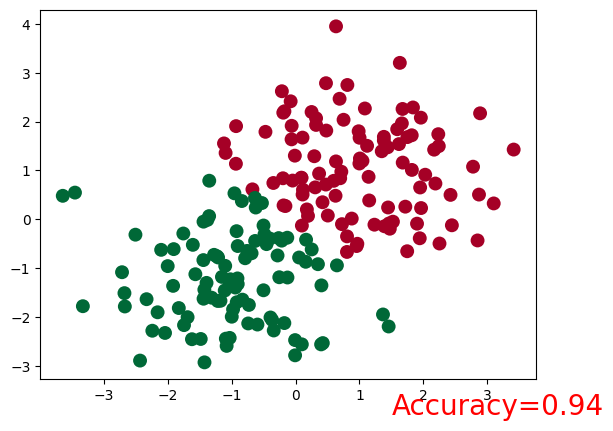

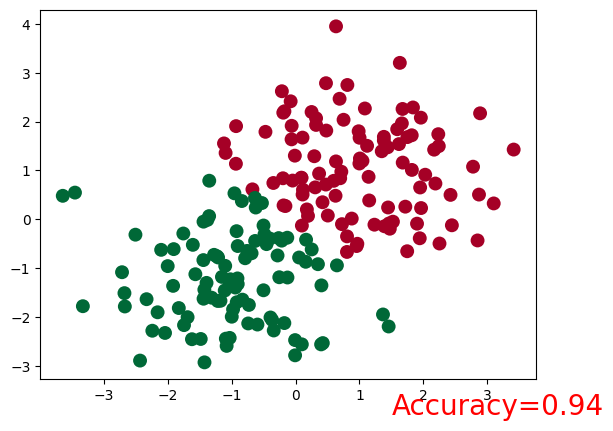

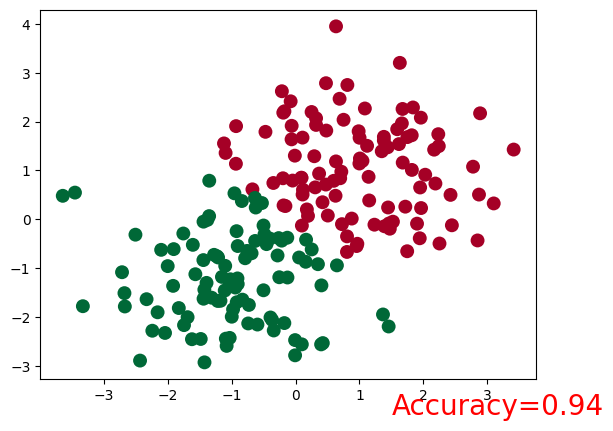

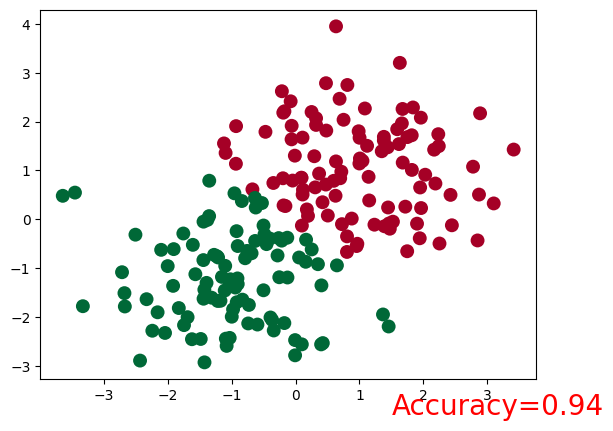

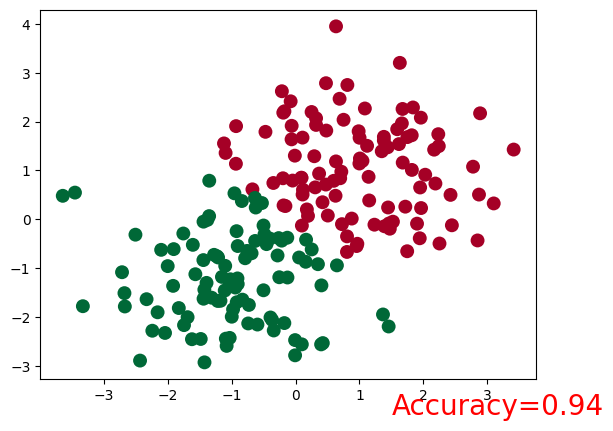

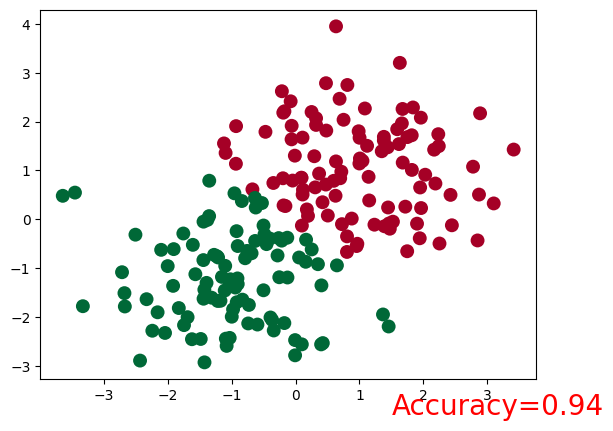

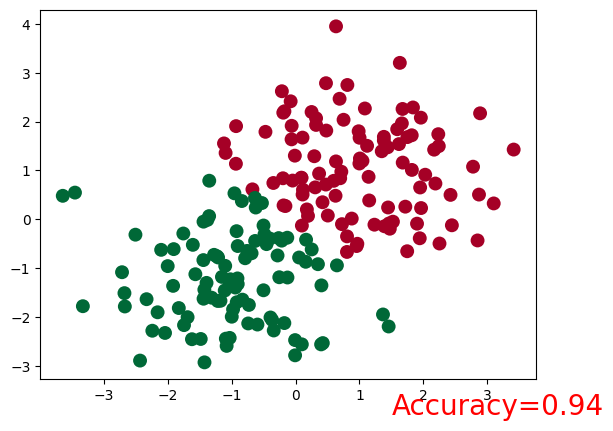

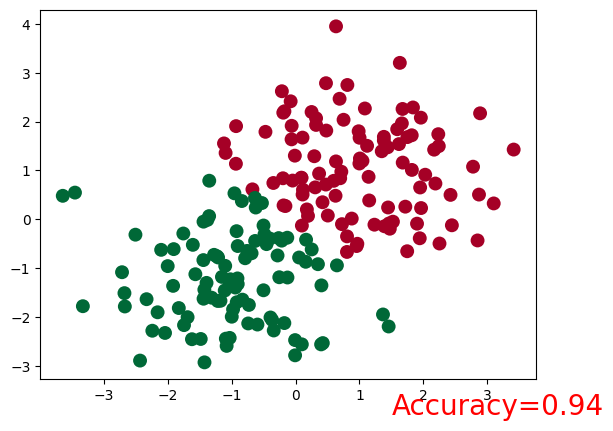

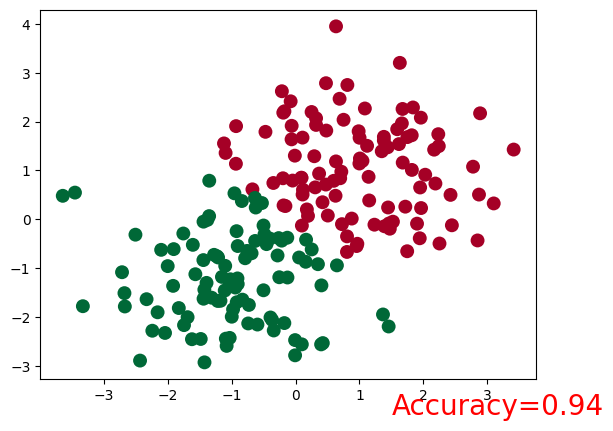

In [18]:
loss_func = torch.nn.CrossEntropyLoss() # loss function
print(net)  # net architecture
plt.ion()   # continuous plotting

for t in range(epochs):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()